0.000999999999999968 1.6196833023773503 2.623373999999999
2.6233739910878096


C:\Users\john\anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in true_divide


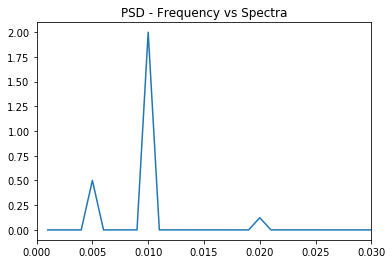

In [2]:
#Basic PSD of Numpy FFT
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft

#Repeat of DFT Example-----------------------------------

#td total number of samples
n = 1000

#td time length seconds
Lx = 100

#angular freq of fund frequency (2pi * fundfreq)
ang = 2.0 * np.pi / Lx

#nyquist frequency
s_freq = n / Lx
nyq = s_freq / 2

##create a signal for td
#instead of dt, third input parameter is number of samples
x = np.linspace(0, Lx, n)
y1 = 1.0*np.cos(5.0*ang*x)
y2 = 2.0*np.sin(10.0*ang*x)
y3 = 0.5*np.sin(20.0*ang*x)

#net signal
y = y1+y2+y3

##Calculate Mean Standard Deviation
mean_y = np.mean(y)
std_y = np.std(y)
var_y = std_y ** 2.0
print(mean_y, std_y, var_y)

##Calculate frequencies, FFT, remove complex conjugates of data,
freqs = fftfreq(n)
mask = freqs > 0
fft_vals = fft(y)
fft_theo = 2.0*np.abs(fft_vals/n)

#Now we want to plot the PSD of this fd-------------------

#regular PSD
ps = 2.0 * np.abs(fft_vals / n) ** 2.0

#Sum of power spectrum values (compare with var_y to crosscheck accuracy of fft)
print(np.sum(ps[mask]))

##alternate power spectrum representations

#power spectra by wavenumber
#Wave numbers - number of waves the signal needs to occupy the domain
nwaves = freqs * n

#power spectra by time-period
#Create necessary time periods
times = 1.0 / freqs
times[freqs == 0.0] = Lx
#plot times[mask], ps[mask]

#Power spectra by varience
pow_var = ps / var_y*100.0

#frequency power spectra - variance preserving form
fps = ps*freqs
#use plt.semilog to plot for good plot visualization

plt.figure(1)
plt.plot(freqs[mask], ps[mask], label='frequency vs spectra')
plt.title('PSD - Frequency vs Spectra')
plt.xlim(0, 0.03)

#plt.figure(2)
#plt.plot(nwaves[mask], ps[mask], label='wavenumber vs spectra')
#plt.title('PSD - Wavenumber vs Spectra')
#plt.xlim(0, 30)

plt.show()

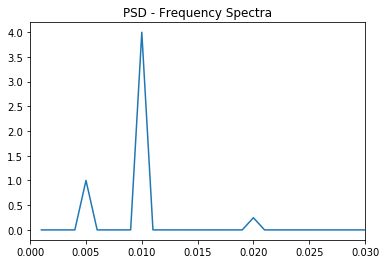

In [4]:
#Basic PSD of scipy FFT
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

#Repeat of DFT Example-----------------------------------

#td total number of samples
n = 1000

#td time length seconds
Lx = 100

#angular freq of fund frequency (2pi * fundfreq)
ang = 2.0 * np.pi / Lx

#nyquist frequency
s_freq = n / Lx
nyq = s_freq / 2

##create a signal for td
#instead of dt, third input parameter is number of samples
x = np.linspace(0, Lx, n)
y1 = 1.0*np.cos(5.0*ang*x)
y2 = 2.0*np.sin(10.0*ang*x)
y3 = 0.5*np.sin(20.0*ang*x)

#net signal
y = y1+y2+y3

##Calculate frequencies, FFT, remove complex conjugates of data,
freqs = fftfreq(n)
mask = freqs > 0
fft_vals = fft(y)
fft_theo = 2.0*np.abs(fft_vals/n)

#Now we want to plot the basic PSD of this fd-------------------

#regular PSD
psd =  (2.0 * np.abs(fft_vals / n)) ** 2.0

plt.figure(1)
plt.plot(freqs[mask], psd[mask], label='frequency vs spectra')
plt.title('PSD - Frequency Spectra')
plt.xlim(0, 0.03)

plt.show()

1000
Sample size: 1000  Sample duration: 10.0 Sample freq: 100.0 freq resolution: 0.1 Nyquist freq: 50.0


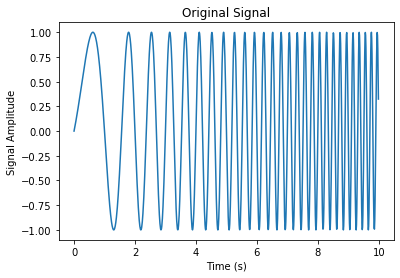

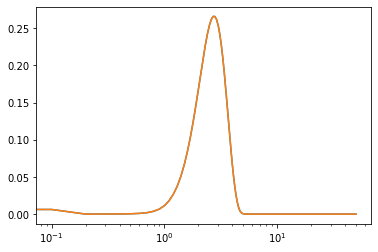

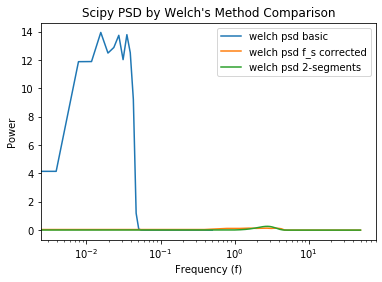

In [5]:
##Welch's example 1

##generate signal
#np.random.seed(0)
dt = 0.01
time_array = np.arange(0, 10, dt)

#sinusoid with a 'Chirp'
sig = np.sin(0.5 * np.pi * time_array * (1.0 + time_array)) 
#add noise
#sig += 0.25 * np.random.randn(sig.size)

##plot signal
plt.figure(1)
plt.plot(time_array, sig)
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude')
plt.title('Original Signal')
plt.savefig('chirp_signal_welch_example.png')


##compute important parameters
print(n)
T = n * dt
f_s = 1 / dt
df = 1 / T
f_nyq = f_s / 2
print('Sample size:', n,' Sample duration:', T,
      'Sample freq:', f_s, 'freq resolution:', df,
      'Nyquist freq:', f_nyq)

##Compute and plot PSD via Welch
from scipy import signal

#welch with default window, sample freq=1.0, segment length, overlap
freqs0, psd0 = signal.welch(sig)
#welch with default window, seg length, and overlap
freqs1, psd1 = signal.welch(sig, fs = f_s)

#welch with default window, adjusted seg length and overlap to 50%
for i in [2.0, 3.0]:
    seg_size = int(np.size(sig)) # REVISIT AND FIX - SEE FFT WElCH AZURE NOTEBOOK
    noverlap = seg_size // i
    freqs, psd = signal.welch(sig, fs=f_s,
                              nperseg=seg_size,
                              noverlap=noverlap)
    plt.figure(2)
    plt.semilogx(freqs, psd, label=('noverlap=n/'+str(i)) )

##Trying Welch by scipy with segments not equal to whole length of signal
seg_len = n
freqs2, psd2 = signal.welch(sig, fs=f_s,
                            nperseg = seg_len,
                            noverlap = seg_len-500)

##plots for comparison

plt.figure(3)
plt.semilogx(freqs0, psd0, label='welch psd basic')
plt.semilogx(freqs1, psd1, label='welch psd f_s corrected')
plt.semilogx(freqs2, psd2, label='welch psd 2-segments')

plt.xlabel('Frequency (f)')
plt.ylabel('Power')
plt.title("Scipy PSD by Welch's Method Comparison")
plt.legend()
plt.savefig('welch_psd_segment_spacing_comparison.png')
plt.show()
